<a href="https://colab.research.google.com/github/kmath22/kmath22/blob/main/Fitness_Tracker_(Anova).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as pl


In [ ]:
from google.colab import files
files.upload()

In [ ]:
df = pd.read_csv('Fitness_Tracker.csv')
df.head()

,ID,Brand_Name,Device_Type,Model_Name,Color,Selling_Price,Original_Price,Display,Rating,Strap_Material,Average_Battery_Life_days,Reviews
0,1,Xiaomi,FitnessBand,Smart Band 5,Black,2499.00,2999.00,AMOLED Display,4.10,Thermoplastic polyurethane,14.0,.
1,2,Xiaomi,FitnessBand,Smart Band 4,Black,2099.00,2499.00,AMOLED Display,4.20,Thermoplastic polyurethane,14.0,.
2,3,Xiaomi,FitnessBand,HMSH01GE,Black,1722.00,2099.00,LCD Display,3.50,Leather,14.0,.
3,4,Xiaomi,FitnessBand,Smart Band 5,Black,2469.00,2999.00,AMOLED Display,4.10,Thermoplastic polyurethane,14.0,.
4,5,Xiaomi,FitnessBand,Band 3,Black,1799.00,2199.00,OLED Display,4.30,Plastic,7.0,.


In [ ]:
df.dtypes

ID                             int64
Brand_Name                    object
Device_Type                   object
Model_Name                    object
Color                         object
Selling_Price                 object
Original_Price                object
Display                       object
Rating                        object
Strap_Material                object
Average_Battery_Life_days    float64
Reviews                       object
dtype: object

In [ ]:
df['Device_Type'].value_counts(normalize = True).round(2)

Smartwatch     0.87
FitnessBand    0.13
Name: Device_Type, dtype: float64

In [ ]:
df['Average_Battery_Life_days'].agg(['mean', 'median', 'std'])

mean      9.026549
median    7.000000
std       7.868670
Name: Average_Battery_Life_days, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0abe95bb50>,
      dtype=object)

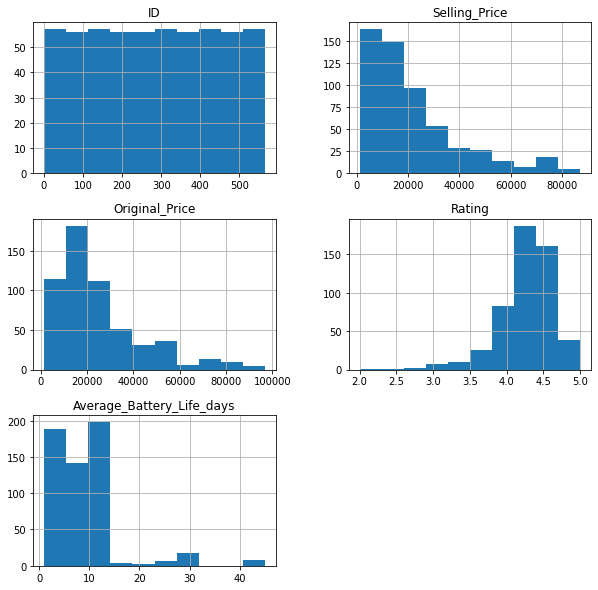

In [ ]:
df.hist(figsize=(10,10))

In [ ]:
df.groupby(['Device_Type'])['Average_Battery_Life_days'].mean()

Device_Type
FitnessBand    7.746667
Smartwatch     9.222449
Name: Average_Battery_Life_days, dtype: float64

In [ ]:
df.groupby(['Device_Type'])['Average_Battery_Life_days'].agg(['mean', 'median', 'std'])

,mean,median,std
Device_Type,,,
FitnessBand,7.746667,7.0,3.089185
Smartwatch,9.222449,7.0,8.347361


In [ ]:
df.groupby(['Display'])['Average_Battery_Life_days'].agg(['mean', 'median', 'std','count'])

,mean,median,std,count
Display,,,,
AMOLED Display,10.563380,12.0,8.005528,355
LCD Display,7.800000,7.0,2.504732,20
LED Display,12.785714,14.0,6.154535,28
OLED Display,11.976744,7.0,9.384608,43
OLED Retina Di,1.000000,1.0,0.000000,86
PMOLED Display,7.150000,7.0,0.670820,20
TFT-LCD Displa,7.076923,7.0,2.660249,13


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


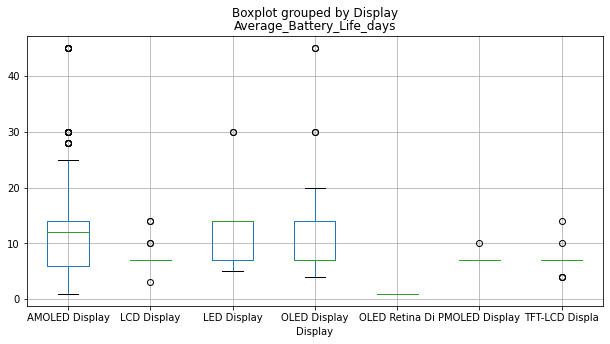

In [ ]:
df.boxplot( 'Average_Battery_Life_days', by = 'Display' , figsize=(10,5))

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
mod = ols('Average_Battery_Life_days ~ Display', data = df).fit()
sm.stats.anova_lm( mod, typ = 2)

,sum_sq,df,F,PR(>F)
Display,7298.913719,6.0,24.574855,6.853866e-26
Residual,27621.688050,558.0,NaN,NaN


In [ ]:
#df["cubicinches"]=pd.to_numeric(df["cubicinches"], errors='coerce')
df['Selling_Price'] = pd.to_numeric(df['Selling_Price'], errors='coerce')
df['Original_Price'] = pd.to_numeric(df['Original_Price'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.dtypes

ID                             int64
Brand_Name                    object
Device_Type                   object
Model_Name                    object
Color                         object
Selling_Price                float64
Original_Price               float64
Display                       object
Rating                       float64
Strap_Material                object
Average_Battery_Life_days    float64
Reviews                       object
dtype: object

In [ ]:
#T test
df.groupby(['Device_Type'])['Average_Battery_Life_days'].describe()

,count,mean,std,min,25%,50%,75%,max
Device_Type,,,,,,,,
FitnessBand,75.0,7.746667,3.089185,3.0,7.0,7.0,7.0,20.0
Smartwatch,490.0,9.222449,8.347361,1.0,2.0,7.0,14.0,45.0


Ttest_indResult(statistic=-1.5143378496488134, pvalue=0.13050135225398826)
                   sum_sq     df         F    PR(>F)
Device_Type    141.662042    1.0  2.293219  0.130501
Residual     34778.939728  563.0       NaN       NaN
AxesSubplot(0.1,0.15;0.8x0.75)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


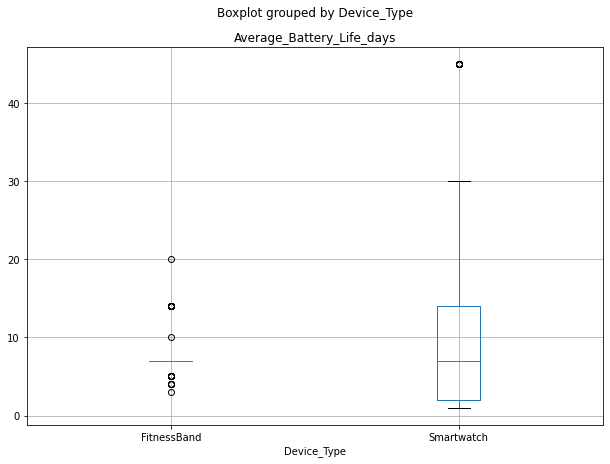

In [ ]:
#T test
import scipy as sci
from scipy.stats import ttest_ind

FitB = df[df['Device_Type']=='FitnessBand']
SmartW = df[df['Device_Type']=='Smartwatch']

#res = ttest_ind(type1['values'], type2['values'])
res = ttest_ind(FitB['Average_Battery_Life_days'], SmartW['Average_Battery_Life_days'])


mod = ols('Average_Battery_Life_days ~ Device_Type', data = df).fit()
ax = sm.stats.anova_lm( mod, typ = 2)

#Boxplot

box = df.boxplot('Average_Battery_Life_days' , by = 'Device_Type' , figsize= (10,7))


print (res)
print (ax)
print (box)

In [ ]:
#Scatterplot for regression

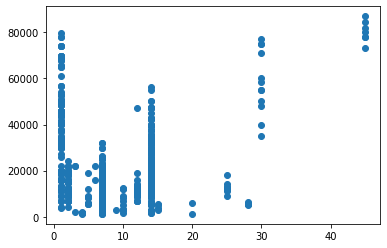

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Average_Battery_Life_days'], df['Selling_Price'])


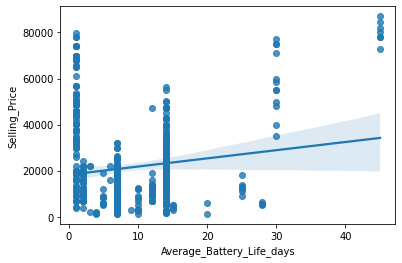

In [ ]:
import seaborn as sns
sns.regplot(x = df['Average_Battery_Life_days'] , y= df['Selling_Price'], data = df)

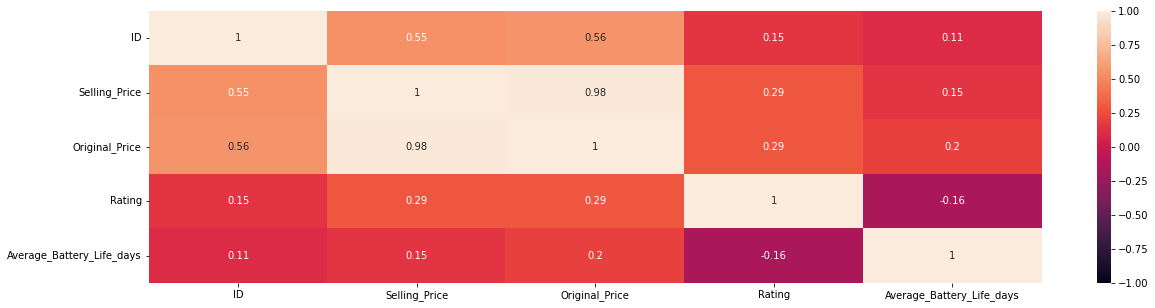

In [ ]:


import seaborn as sns
plt.figure(figsize=(20, 5))
heatmap = sns.heatmap(df.corr(),vmin = -1 , vmax= 1, annot=True)

In [ ]:
df.corr()

,ID,Selling_Price,Average_Battery_Life_days
ID,1.000000,0.545620,0.107952
Selling_Price,0.545620,1.000000,0.149892
Average_Battery_Life_days,0.107952,0.149892,1.000000


In [ ]:
df.dtypes

ID                            int64
Brand_Name                   object
Device_Type                  object
Model_Name                   object
Color                        object
Selling_Price                object
Original_Price               object
Display                      object
Rating                       object
Strap_Material               object
Average_Battery_Life_days     int64
Reviews                      object
dtype: object

In [ ]:
df['Selling_Price'].mean()

TypeError: ignored